In [533]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [534]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [535]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [536]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [538]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

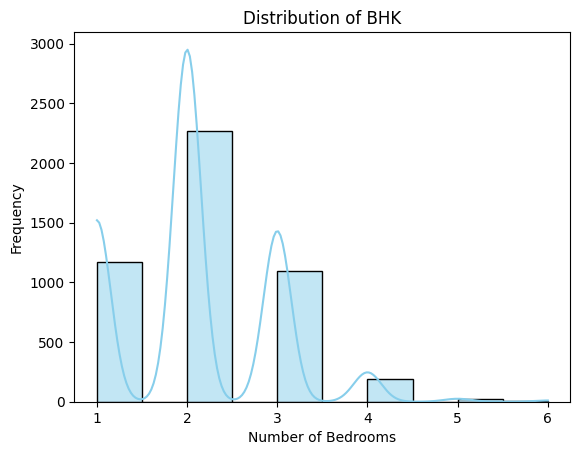

0.5992157733648072


In [539]:
sns.histplot(df['BHK'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BHK')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()
print(df['BHK'].skew())

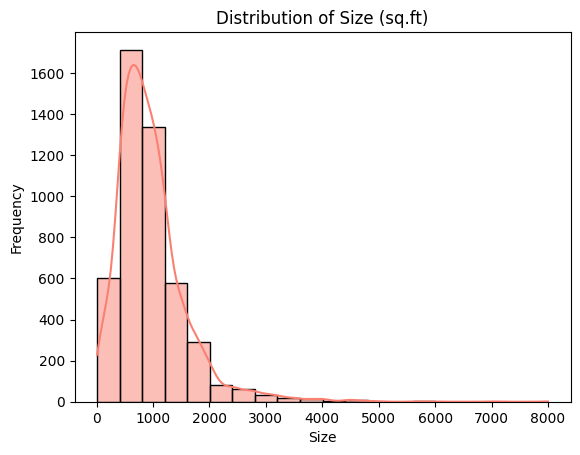

2.2998924373541834


In [540]:
sns.histplot(df['Size'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Size (sq.ft)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Size'].skew())

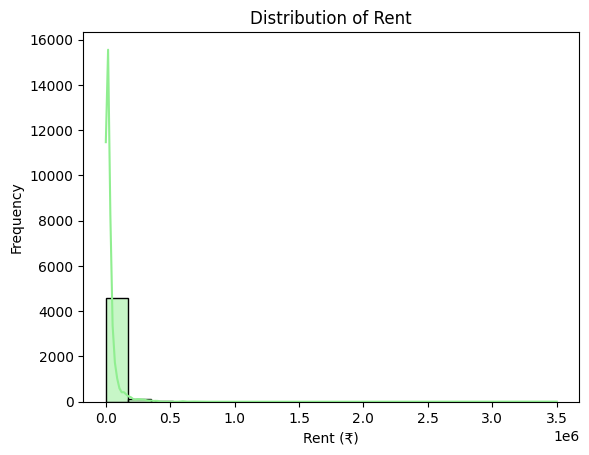

21.409942283288803


In [541]:
sns.histplot(df['Rent'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Rent')
plt.xlabel('Rent (₹)')
plt.ylabel('Frequency')
plt.show()
print(df['Rent'].skew())

In [542]:
from sklearn.preprocessing import PowerTransformer
pt_bhk = PowerTransformer(method='yeo-johnson')
pt_size = PowerTransformer(method='yeo-johnson')
pt_rent = PowerTransformer(method='yeo-johnson')

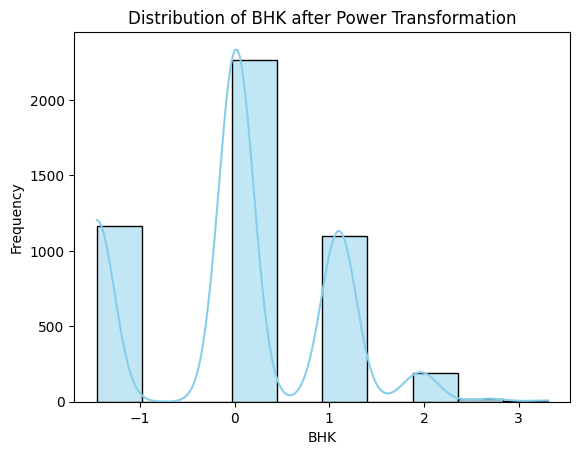

-0.005718213972698176


In [543]:
df['BHK_transformed'] = pt_bhk.fit_transform(df[['BHK']])
sns.histplot(df['BHK_transformed'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BHK after Power Transformation')
plt.xlabel('BHK')
plt.ylabel('Frequency')
plt.show()
print(df['BHK_transformed'].skew())

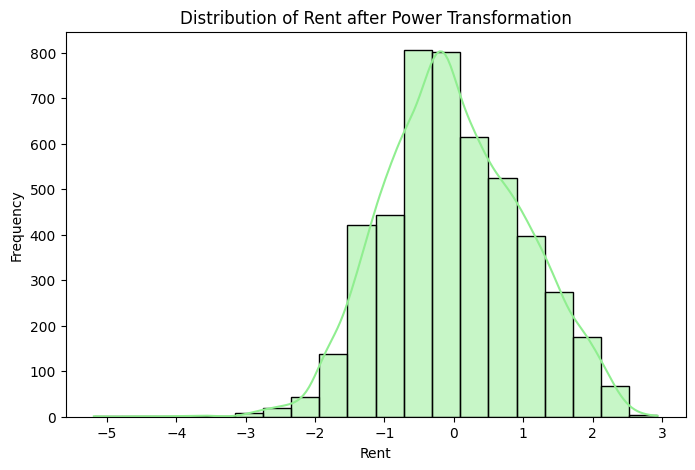

0.03375951838588836


In [544]:
df['Rent_transformed'] = pt_rent.fit_transform(df[['Rent']])
plt.figure(figsize=(8,5))
sns.histplot(df['Rent_transformed'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Rent after Power Transformation')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()
print(df['Rent_transformed'].skew())

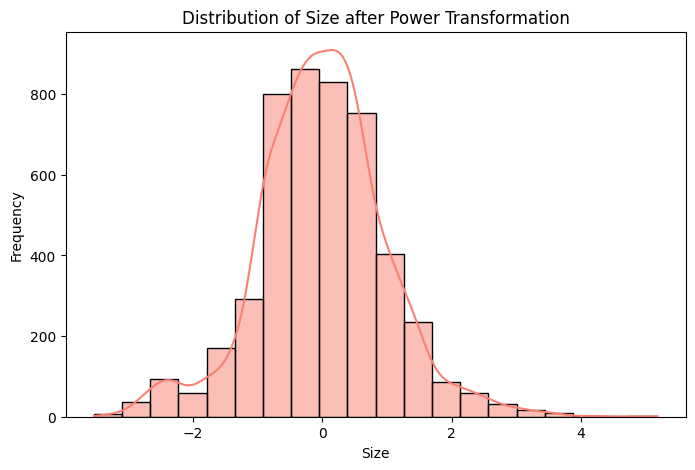

0.08229828671608086


In [545]:
df['Size_transformed'] = pt_size.fit_transform(df[['Size']])
plt.figure(figsize=(8,5))
sns.histplot(df['Size_transformed'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Size after Power Transformation')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Size_transformed'].skew())

In [546]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,BHK_transformed,Rent_transformed,Size_transformed
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.017108,-0.698933,0.418173
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.017108,0.189573,-0.091187
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.017108,-0.000197,0.259952
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.017108,-0.698933,-0.091187
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.017108,-1.134435,0.001613


In [547]:
df['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [552]:
df_model = df[['BHK_transformed', 'Size_transformed', 'City', 'Furnishing Status', 'Rent_transformed','Area Type','Floor','Tenant Preferred','Area Locality']].copy()
categorical_cols = ['City','Furnishing Status','Area Type','Floor','Tenant Preferred','Area Locality']
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
df_encoded.head()

,BHK_transformed,Size_transformed,Rent_transformed,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,0.017108,0.418173,-0.698933,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0.017108,-0.091187,0.189573,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.017108,0.259952,-0.000197,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.017108,-0.091187,-0.698933,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.017108,0.001613,-1.134435,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [553]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.head()

,BHK_transformed,Size_transformed,Rent_transformed,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,...,Area Locality_sra,Area Locality_sri sai arcade madinaguda,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,0.017108,0.418173,-0.698933,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.017108,-0.091187,0.189573,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.017108,0.259952,-0.000197,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.017108,-0.091187,-0.698933,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.017108,0.001613,-1.134435,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [550]:
'''corr = df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f")'''

'corr = df_encoded.corr()\nplt.figure(figsize=(10,8))\nsns.heatmap(corr,annot=True, cmap=\'coolwarm\', fmt=".2f")'

In [554]:
x = df_encoded.drop(['Rent_transformed'], axis=1)
y = df_encoded['Rent_transformed']

model = LinearRegression()
model.fit(x, y)
predict = model.predict(x)

coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient (Slope)': model.coef_
})
intercept = model.intercept_
r2 = r2_score(y, predict)
mse = np.sqrt(mean_squared_error(y, predict))

print(coefficients)
print(intercept)
print(r2)
print(mse)


                                        Feature  Coefficient (Slope)
0                               BHK_transformed             0.332068
1                              Size_transformed             0.228707
2                                  City_Chennai            -0.552476
3                                    City_Delhi            -1.928829
4                                City_Hyderabad            -0.590240
...                                         ...                  ...
2721  Area Locality_vanamali chs ghatla, Ghatla             0.390626
2722                 Area Locality_venkatapuram            -1.583346
2723      Area Locality_venkatesa perumal nagar            -1.586181
2724   Area Locality_villvam towers tnhb colony            -1.995695
2725                   Area Locality_whitefield            -2.006519

[2726 rows x 2 columns]
1.9320575480917934
0.935063926075739
0.2548255754908856
